In [85]:
#imports
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [86]:
data_dir = "/Users/samuel/Desktop/EKU Tübingen/data_literacy/project/data"  
meta_file = os.path.join(data_dir, "META_File_IDs_Age_Gender_Education_Drug_Smoke_SKID_LEMON.csv")

In [87]:
# Emotion Regulation Tests
emotion_files = [
    "Emotion_and_Personality_Test_Battery_LEMON/ERQ.csv",  # Emotion Regulation Questionnaire
    "Emotion_and_Personality_Test_Battery_LEMON/CERQ.csv"  # Cognitive Emotion Regulation Questionnaire
]

# Behavioral Features
behavioral_files = [
    "Emotion_and_Personality_Test_Battery_LEMON/MSPSS.csv",  # Perceived Social Support
    "Emotion_and_Personality_Test_Battery_LEMON/F-SozU_K-22.csv",  # Social Support Questionnaire
    "Emotion_and_Personality_Test_Battery_LEMON/BISBAS.csv"  # BIS/BAS
]

# Personality and Emotional Traits
personality_files = [
    "Emotion_and_Personality_Test_Battery_LEMON/NEO_FFI.csv",  # Personality Inventory
    "Emotion_and_Personality_Test_Battery_LEMON/STAI_G_X2.csv",  # Anxiety Inventory
    "Emotion_and_Personality_Test_Battery_LEMON/STAXI.csv"  # Anger Expression Inventory
]

# Cognitive Tests
cognitive_files = [
    "Cognitive_Test_Battery_LEMON/CVLT.csv",  # Verbal Learning Test
    "Cognitive_Test_Battery_LEMON/TAP-Alertness.csv",  # TAP Alertness
    "Cognitive_Test_Battery_LEMON/TAP-Working Memory.csv"  # TAP Working Memory
]

# Medical Data Files
medical_files = [
    "Medical_LEMON/Anthropometry/Anthropometry_LEMON.csv",
    "Medical_LEMON/Blood Pressure/Blood_Pressure_LEMON.csv",
    "Medical_LEMON/Blood Sample/Blood_Results_LEMON.csv",
]

# Combine All Files
all_files = {
    "meta": meta_file,
    "emotion": emotion_files,
    "behavioral": behavioral_files,
    "personality": personality_files,
    "cognitive": cognitive_files,
    "medical": medical_files
}

# Load Metadata
print("Loading Metadata...")
meta = pd.read_csv(all_files["meta"])
meta.rename(columns={meta.columns[0]: "subnumber"}, inplace=True)

# Load and Merge All Datasets
dataframes = []

# Function to Load and Rename First Column to 'subnumber'
def load_and_prepare(file_path):
    df = pd.read_csv(file_path)
    df.rename(columns={df.columns[0]: "subnumber"}, inplace=True)
    return df

# Load Emotion, Behavioral, Personality, Cognitive, and Medical Data
for category, files in all_files.items():
    if category != "meta":
        for file in files:
            file_path = os.path.join(data_dir, file)
            try:
                df = load_and_prepare(file_path)
                dataframes.append(df)
                print(f"Loaded: {file} with shape {df.shape}")
            except Exception as e:
                print(f"Error loading {file}: {e}")

Loading Metadata...
Loaded: Emotion_and_Personality_Test_Battery_LEMON/ERQ.csv with shape (221, 3)
Loaded: Emotion_and_Personality_Test_Battery_LEMON/CERQ.csv with shape (221, 10)
Loaded: Emotion_and_Personality_Test_Battery_LEMON/MSPSS.csv with shape (221, 5)
Loaded: Emotion_and_Personality_Test_Battery_LEMON/F-SozU_K-22.csv with shape (221, 6)
Loaded: Emotion_and_Personality_Test_Battery_LEMON/BISBAS.csv with shape (221, 5)
Loaded: Emotion_and_Personality_Test_Battery_LEMON/NEO_FFI.csv with shape (221, 6)
Loaded: Emotion_and_Personality_Test_Battery_LEMON/STAI_G_X2.csv with shape (221, 2)
Loaded: Emotion_and_Personality_Test_Battery_LEMON/STAXI.csv with shape (221, 8)
Loaded: Cognitive_Test_Battery_LEMON/CVLT.csv with shape (228, 17)
Loaded: Cognitive_Test_Battery_LEMON/TAP-Alertness.csv with shape (228, 18)
Loaded: Cognitive_Test_Battery_LEMON/TAP-Working Memory.csv with shape (228, 13)
Loaded: Medical_LEMON/Anthropometry/Anthropometry_LEMON.csv with shape (228, 5)
Loaded: Medical_L

In [88]:
df.head()

,subnumber,Date_Blood_Drawing_LabAnalysis,ALAT_in_ µkat_l,ALAT_Reference_range,ASAT_in_µkat_l,ASAT_Reference_range,HCT _in_l_l,HCT_Reference range,HGB_in_mmol_l,HGB_Reference range,...,NA_in_mmol_l,NA_Reference range,PT_in_%,PT_Reference range,PTR,PTS_in_sec,TRIG_in_mmol_l,TRIG_Reference range,TSH_in_mU_l,TSH_Reference range
0,sub-032311,DAY1+0,0.28,0.17 - 0.85,0.38,0.17 - 0.85,0.445,0.4 - 0.53,9.4,8.4 - 10.9,...,138.7,135 - 145,108.0,> 70,NaN,NaN,1.79,< 1.7,1.48,0.4 - 3.77
1,sub-032309,DAY1+0,0.24,0.17 - 0.85,0.30,0.17 - 0.85,0.386,0.4 - 0.53,7.9,8.4 - 10.9,...,140.1,135 - 145,114.0,> 70,1.03,11.7,0.80,< 2.26,1.65,0.4 - 3.77
2,sub-032382,DAY1+0,1.10,0.17 - 0.85,0.47,0.17 - 0.85,0.441,0.4 - 0.53,9.6,8.4 - 10.9,...,136.6,135 - 145,96.0,> 70,0.97,11.1,2.60,< 2.26,1.31,0.4 - 3.77
3,sub-032302,DAY1+0,0.22,0.17 - 0.58,0.27,0.17 - 0.6,0.352,0.36 - 0.48,7.2,7.5 - 9.9,...,140.1,135 - 145,101.0,> 70,0.94,10.7,1.88,< 2.26,2.67,0.4 - 3.77
4,sub-032315,DAY1+0,0.31,0.17 - 0.85,0.31,0.17 - 0.85,0.465,0.4 - 0.53,9.8,8.4 - 10.9,...,136.2,135 - 145,89.0,> 70,1.03,11.7,1.90,< 2.26,1.75,0.4 - 3.77


In [89]:
# Merge All DataFrames
merged_data = meta.copy()

for i, df in enumerate(dataframes):
    if "subnumber" not in df.columns:
        print(f"Skipping file {i+1}: Missing 'subnumber' column.")
        continue
    
    try:
        merged_data = pd.merge(merged_data, df, on="subnumber", how="inner")
        print(f"Merged DataFrame {i+1} successfully.")
    except Exception as e:
        print(f"Error merging DataFrame {i+1}: {e}")

# Remove Duplicate Columns if Any
merged_data = merged_data.loc[:, ~merged_data.columns.duplicated()]

# Save Merged Data to CSV
output_path = os.path.join(data_dir, "final_merged_dataset.csv")
merged_data.to_csv(output_path, index=False)
print(f"Final Merged Data Saved at: {output_path}")

Merged DataFrame 1 successfully.
Merged DataFrame 2 successfully.
Merged DataFrame 3 successfully.
Merged DataFrame 4 successfully.
Merged DataFrame 5 successfully.
Merged DataFrame 6 successfully.
Merged DataFrame 7 successfully.
Merged DataFrame 8 successfully.
Merged DataFrame 9 successfully.
Merged DataFrame 10 successfully.
Merged DataFrame 11 successfully.
Merged DataFrame 12 successfully.
Merged DataFrame 13 successfully.
Merged DataFrame 14 successfully.
Final Merged Data Saved at: /Users/samuel/Desktop/EKU Tübingen/data_literacy/project/data/final_merged_dataset.csv


In [90]:
# Data Cleaning
missing_threshold = 0.3
missing_percent = merged_data.isnull().mean()
columns_to_drop = missing_percent[missing_percent > missing_threshold].index

# Drop Columns and Handle Missing Data
merged_data_clean = merged_data.drop(columns=columns_to_drop)

# Impute Missing Values
for col in merged_data_clean.columns:
    if merged_data_clean[col].dtype == 'object':
        merged_data_clean[col].fillna(merged_data_clean[col].mode()[0], inplace=True)
    else:
        merged_data_clean[col].fillna(merged_data_clean[col].median(), inplace=True)
        
# Ensure 'Relationship_Status' Is Uppercase
if "Relationship_Status" in merged_data_clean.columns:
    merged_data_clean["Relationship_Status"] = merged_data_clean["Relationship_Status"].str.upper()

# Check Remaining Missing Values
print("Remaining Missing Values After Cleaning:")
merged_data_clean.isnull().sum().sort_values(ascending=False)

Remaining Missing Values After Cleaning:


subnumber               0
TAP_WM_4                0
ALAT_in_ µkat_l         0
ALAT_Reference_range    0
ASAT_in_µkat_l          0
                       ..
CVLT_7                  0
CVLT_8                  0
CVLT_9                  0
CVLT_10                 0
TSH_Reference range     0
Length: 177, dtype: int64

In [91]:
from sklearn.preprocessing import LabelEncoder

# Automatically Detect Categorical Columns
categorical_cols = merged_data_clean.select_dtypes(include=['object']).columns.tolist()

# Initialize Label Encoders Dictionary
label_encoders = {}

# Encode Categorical Variables
for col in categorical_cols:
    if col in merged_data_clean.columns:
        le = LabelEncoder()
        merged_data_clean[col] = le.fit_transform(merged_data_clean[col].astype(str))
        label_encoders[col] = le

print("Categorical Variables Encoded.")
merged_data_clean.head()

Categorical Variables Encoded.


,subnumber,Gender_ 1=female_2=male,Age,Handedness,Education,DRUG,DRUG_0=negative_1=Positive,Smoking,"Smoking_num_(Non-smoker=1, Occasional Smoker=2, Smoker=3)",SKID_Diagnoses,...,LDLC_in_mmol_l,LDLC_Reference range,NA_in_mmol_l,NA_Reference range,PT_in_%,PT_Reference range,TRIG_in_mmol_l,TRIG_Reference range,TSH_in_mU_l,TSH_Reference range
0,10,2,0,3,1,1,0.0,0,1.0,14,...,3.66,0,138.7,0,108.0,0,1.79,0,1.48,1
1,8,2,0,3,1,1,0.0,1,2.0,14,...,2.31,0,140.1,0,114.0,0,0.80,1,1.65,1
2,81,2,1,3,1,1,0.0,1,2.0,14,...,3.94,0,136.6,0,96.0,0,2.60,1,1.31,1
3,1,1,0,3,1,1,0.0,0,1.0,14,...,3.37,0,140.1,0,101.0,0,1.88,1,2.67,1
4,14,2,0,3,1,1,0.0,0,1.0,14,...,2.81,0,136.2,0,89.0,0,1.90,1,1.75,1


In [92]:
# Feature Engineering with Medical Data Fix

# Ensure Safe Numeric Conversion Function
def safe_numeric_conversion(df, cols):
    for col in cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

# Define Relevant Feature Categories
# Emotional Regulation
cerq_cols = [col for col in merged_data_clean.columns if "CERQ" in col]
erq_cols = [col for col in merged_data_clean.columns if "ERQ" in col]

# Social and Behavioral Features
mspss_cols = [col for col in merged_data_clean.columns if "MSPSS" in col]
fsoz_cols = [col for col in merged_data_clean.columns if "FSoZu" in col]
bisbas_cols = [col for col in merged_data_clean.columns if "BIS" in col or "BAS" in col]

# Personality and Emotional Traits
neo_cols = [col for col in merged_data_clean.columns if "NEO" in col]
stai_cols = [col for col in merged_data_clean.columns if "STAI" in col]
staxi_cols = [col for col in merged_data_clean.columns if "STAXI" in col]

# Cognitive Tests
cvlt_cols = [col for col in merged_data_clean.columns if "CVLT" in col]
tap_cols = [col for col in merged_data_clean.columns if "TAP" in col]

# Medical Data
anthropometry_cols = [col for col in merged_data_clean.columns if "Anthropometry" in col]
bp_cols = [col for col in merged_data_clean.columns if "BP" in col]
blood_sample_cols = [col for col in merged_data_clean.columns if "Blood_Sample" in col]

# Convert All Columns to Numeric Before Aggregating
all_cols = cerq_cols + erq_cols + mspss_cols + fsoz_cols + bisbas_cols + neo_cols + \
           stai_cols + staxi_cols + cvlt_cols + tap_cols + anthropometry_cols + bp_cols + blood_sample_cols

merged_data_clean = safe_numeric_conversion(merged_data_clean, all_cols)

# Aggregate Features
if cerq_cols: merged_data_clean["CERQ_Sum"] = merged_data_clean[cerq_cols].sum(axis=1)
if erq_cols: merged_data_clean["ERQ_Sum"] = merged_data_clean[erq_cols].sum(axis=1)
if mspss_cols: merged_data_clean["MSPSS_Sum"] = merged_data_clean[mspss_cols].sum(axis=1)
if fsoz_cols: merged_data_clean["FSoZu_Sum"] = merged_data_clean[fsoz_cols].sum(axis=1)
if bisbas_cols: merged_data_clean["BISBAS_Total"] = merged_data_clean[bisbas_cols].sum(axis=1)
if neo_cols: merged_data_clean["NEO_Sum"] = merged_data_clean[neo_cols].sum(axis=1)
if stai_cols: merged_data_clean["STAI_Sum"] = merged_data_clean[stai_cols].sum(axis=1)
if staxi_cols: merged_data_clean["STAXI_Sum"] = merged_data_clean[staxi_cols].sum(axis=1)
if cvlt_cols: 
    merged_data_clean["CVLT_Sum"] = merged_data_clean[cvlt_cols].sum(axis=1)
    merged_data_clean["CVLT_Mean"] = merged_data_clean[cvlt_cols].mean(axis=1)
if tap_cols: merged_data_clean["TAP_Sum"] = merged_data_clean[tap_cols].sum(axis=1)

# Medical Aggregates
if anthropometry_cols: merged_data_clean["Anthropometry_Sum"] = merged_data_clean[anthropometry_cols].sum(axis=1)
if bp_cols: merged_data_clean["BloodPressure_Mean"] = merged_data_clean[bp_cols].mean(axis=1)
if blood_sample_cols: merged_data_clean["BloodSample_Sum"] = merged_data_clean[blood_sample_cols].sum(axis=1)

# Convert Age to Numeric Safely
if "Age" in merged_data_clean.columns:
    merged_data_clean["Age_Numeric"] = merged_data_clean["Age"].astype(str).str.extract(r'(\d+)').astype(float)

# Display the Newly Engineered Features
new_features = [
    "CERQ_Sum", "ERQ_Sum", "MSPSS_Sum", "FSoZu_Sum", "BISBAS_Total",
    "NEO_Sum", "STAI_Sum", "STAXI_Sum", "CVLT_Sum", "CVLT_Mean", 
    "TAP_Sum", "Anthropometry_Sum", "BloodPressure_Mean", 
    "BloodSample_Sum", "Age_Numeric"
]

# Check if Features Were Created
existing_new_features = [feat for feat in new_features if feat in merged_data_clean.columns]

if existing_new_features:
    print("Feature Engineering Completed.")
    display(merged_data_clean[existing_new_features].head())
else:
    print("No New Features Were Created.")

Feature Engineering Completed.


/var/folders/7l/wr39ns_13xdbtxc49y6l0qjh0000gn/T/ipykernel_48029/3292705151.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  if cerq_cols: merged_data_clean["CERQ_Sum"] = merged_data_clean[cerq_cols].sum(axis=1)
/var/folders/7l/wr39ns_13xdbtxc49y6l0qjh0000gn/T/ipykernel_48029/3292705151.py:42: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  if erq_cols: merged_data_clean["ERQ_Sum"] = merged_data_clean[erq_cols].sum(axis=1)
/var/folders/7l/wr39ns_13xdbtxc49y6l0qjh0000gn/T/ipykernel_48029/3292705151.py:43: PerformanceWarning: Da

,CERQ_Sum,ERQ_Sum,MSPSS_Sum,FSoZu_Sum,BISBAS_Total,NEO_Sum,STAI_Sum,STAXI_Sum,CVLT_Sum,CVLT_Mean,TAP_Sum,BloodPressure_Mean,Age_Numeric
0,44,53.583333,148,20.014286,57,12.416667,38,106,230.301,15.353400,3460.020,100.50,0.0
1,43,51.416667,160,22.042857,56,11.250000,46,88,210.582,14.038800,3437.886,102.50,0.0
2,51,60.166667,146,21.614286,62,11.333333,54,138,181.386,12.092400,3087.963,114.75,1.0
3,52,59.750000,128,17.028571,60,12.333333,49,87,225.782,15.052133,3527.010,94.50,0.0
4,45,51.666667,108,15.985714,59,10.666667,41,84,203.619,13.574600,2618.003,109.50,0.0


In [93]:
# Save Cleaned and Preprocessed Data
output_path_clean = os.path.join(data_dir, "cleaned_processed_data.csv")
merged_data_clean.to_csv(output_path_clean, index=False)

print(f"Cleaned and Processed Data Saved at: {output_path_clean}")


Cleaned and Processed Data Saved at: /Users/samuel/Desktop/EKU Tübingen/data_literacy/project/data/cleaned_processed_data.csv


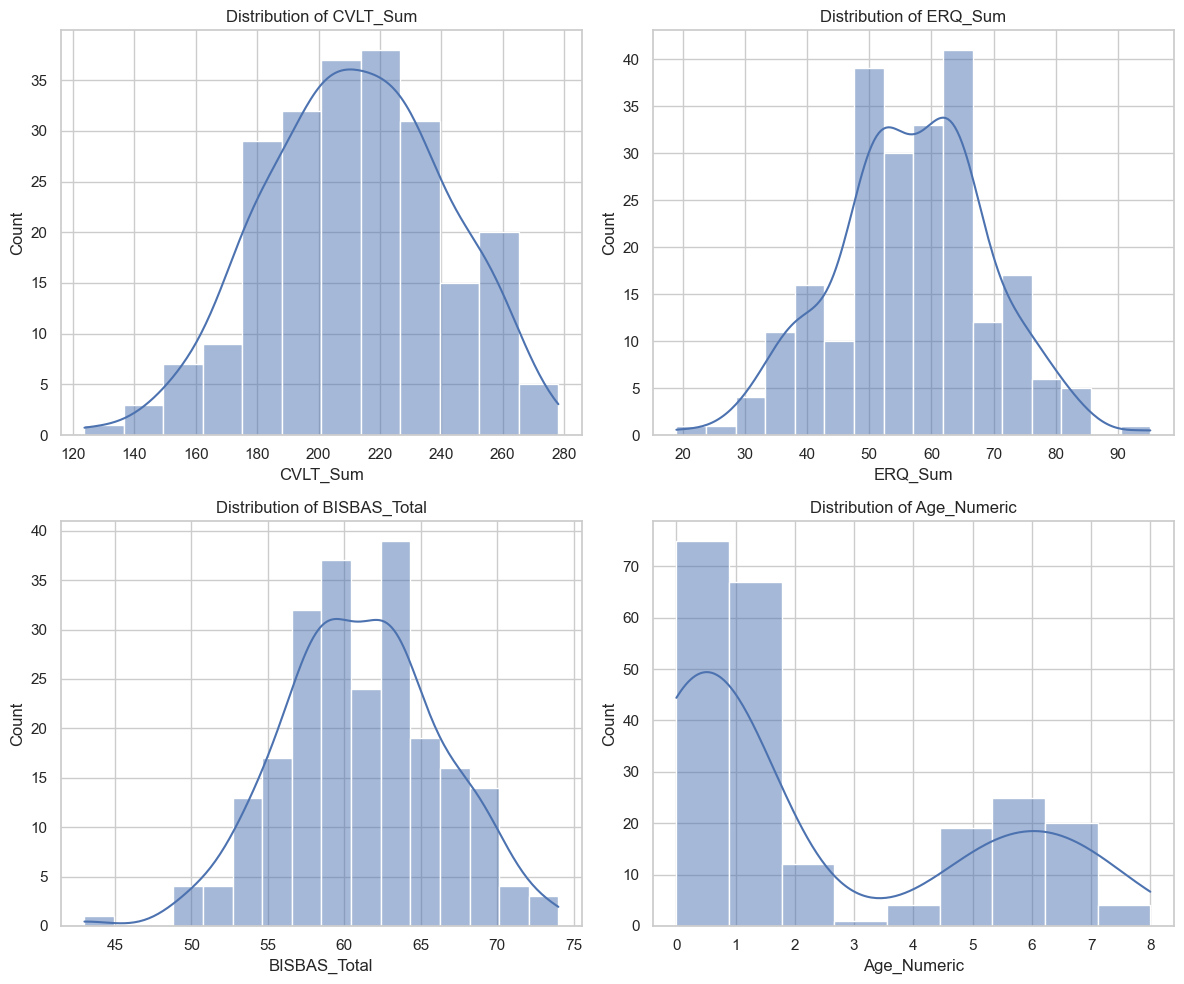

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn Style
sns.set(style="whitegrid")

# Plot Distributions of Key Features
key_features = {
    "CVLT_Sum": "CVLT (Verbal Learning)",
    "ERQ_Sum": "ERQ (Emotional Regulation)",
    "BISBAS_Total": "BISBAS (Behavioral Activation/Inhibition)",
    "Age_Numeric": "Age (Numeric)"
}
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for ax, feature in zip(axes.flatten(), key_features):
    if feature in merged_data_clean.columns:
        sns.histplot(merged_data_clean[feature], kde=True, ax=ax)
        ax.set_title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()


### Distribution of Key Features

- **CVLT_Sum (California Verbal Learning Test):**  
  This test measures verbal learning and memory performance. A normal distribution is observed, with most scores clustering around 200–220. This suggests a typical cognitive performance in verbal learning across participants.

- **ERQ_Sum (Emotion Regulation Questionnaire):**  
  The ERQ assesses emotional regulation strategies, specifically *cognitive reappraisal* and *expressive suppression*. The distribution skews slightly right, with most scores between 50 and 70, indicating varying levels of emotional regulation among participants.

- **BISBAS_Total (Behavioral Inhibition and Activation System):**  
  The BIS/BAS scale measures motivational tendencies—BIS (inhibition for punishment) and BAS (activation for rewards). The distribution shows two peaks, suggesting the presence of distinct behavioral motivation patterns in the sample.

- **Age_Numeric:**  
  The age distribution is highly skewed, with most participants between 20–30 years old, and a smaller group in the 60–70 age range. This uneven age distribution will likely influence the `Relationship_Status`.

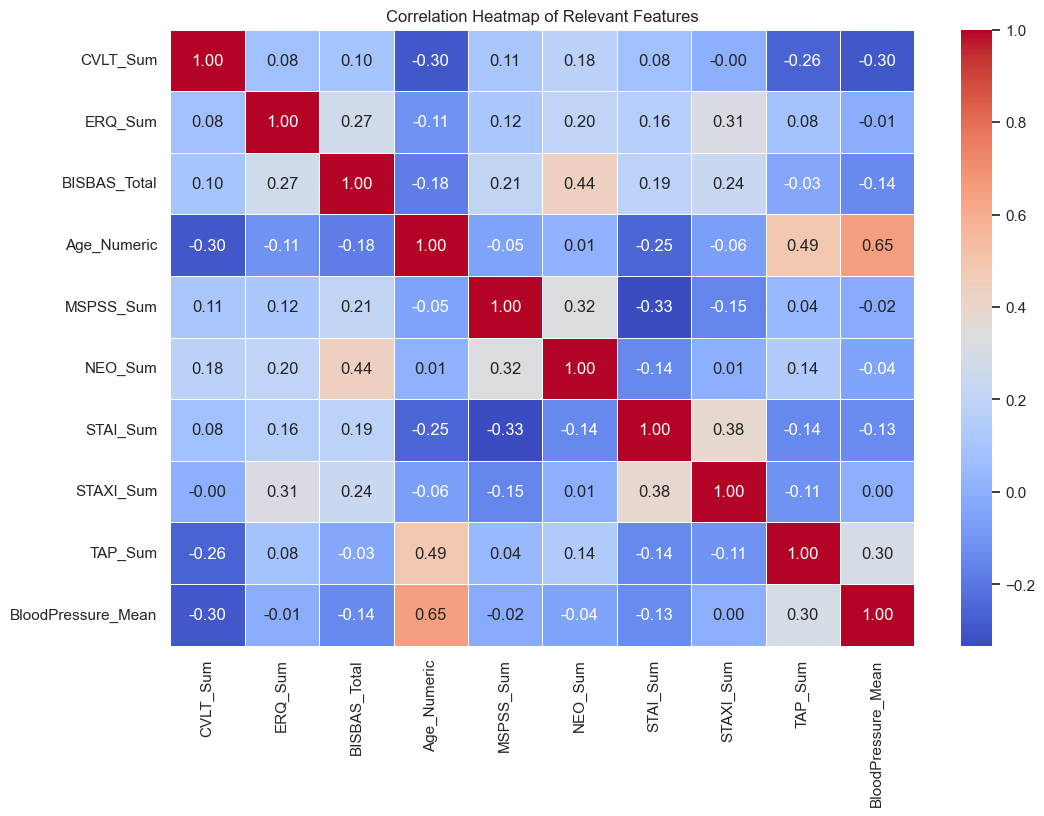

In [95]:
# Relevant Features for Correlation
relevant_features = [
    "CVLT_Sum", "ERQ_Sum", "BISBAS_Total", "Age_Numeric", 
    "MSPSS_Sum", "NEO_Sum", "STAI_Sum", "STAXI_Sum", "TAP_Sum", 
    "Anthropometry_Sum", "BloodPressure_Mean", "BloodSample_Sum"
]

# Filter Existing Features
existing_features = [feat for feat in relevant_features if feat in merged_data_clean.columns]

# Plot Correlation Heatmap
correlation_matrix = merged_data_clean[existing_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Relevant Features")
plt.show()

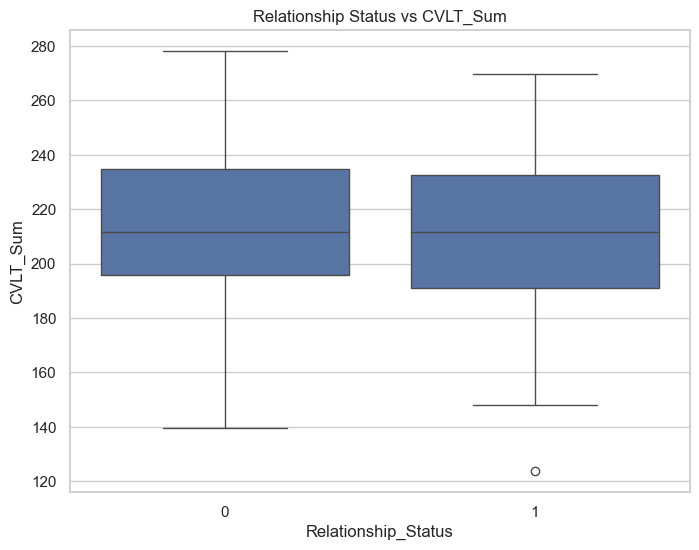

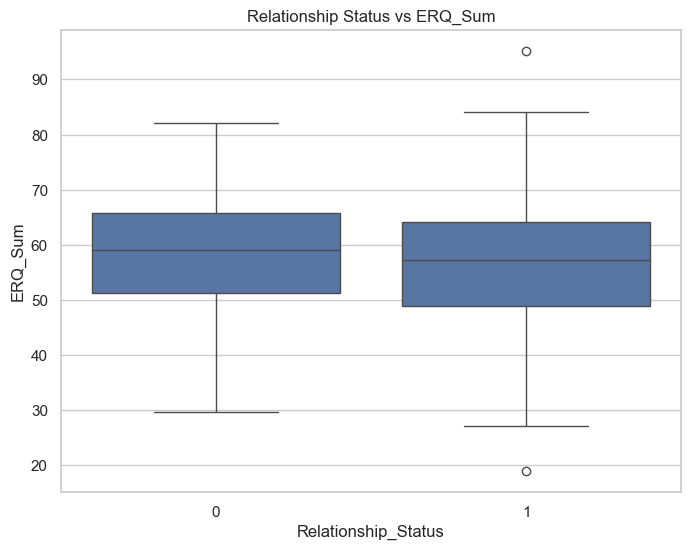

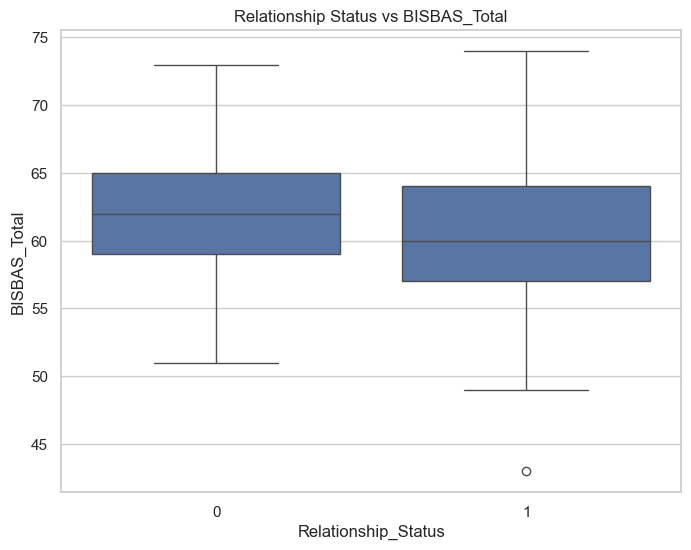

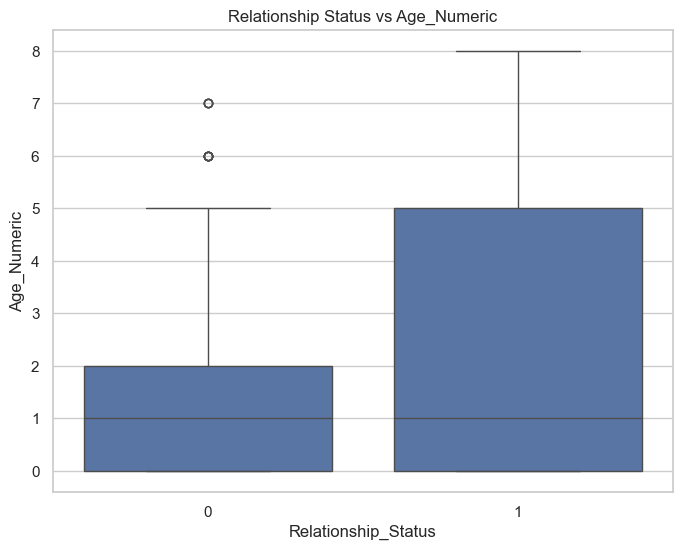

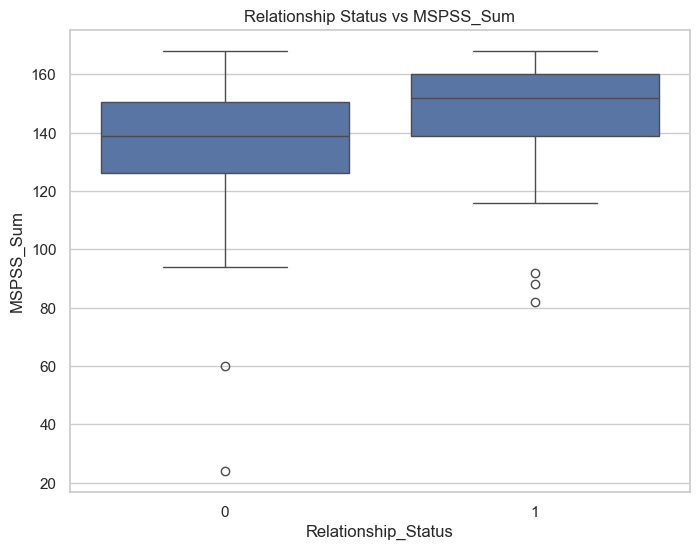

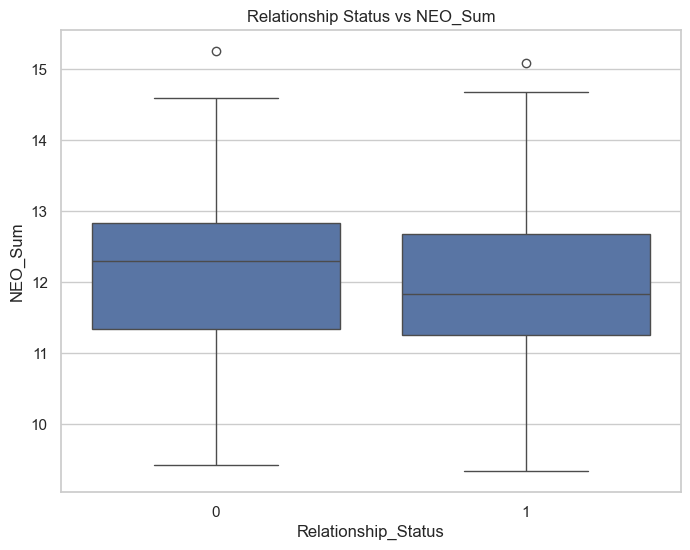

In [96]:
# Boxplots for Key Features by Relationship Status
boxplot_features = ["CVLT_Sum", "ERQ_Sum", "BISBAS_Total", "Age_Numeric", "MSPSS_Sum", "NEO_Sum"]

for feature in boxplot_features:
    if feature in merged_data_clean.columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=merged_data_clean, x="Relationship_Status", y=feature)
        plt.title(f"Relationship Status vs {feature}")
        plt.show()

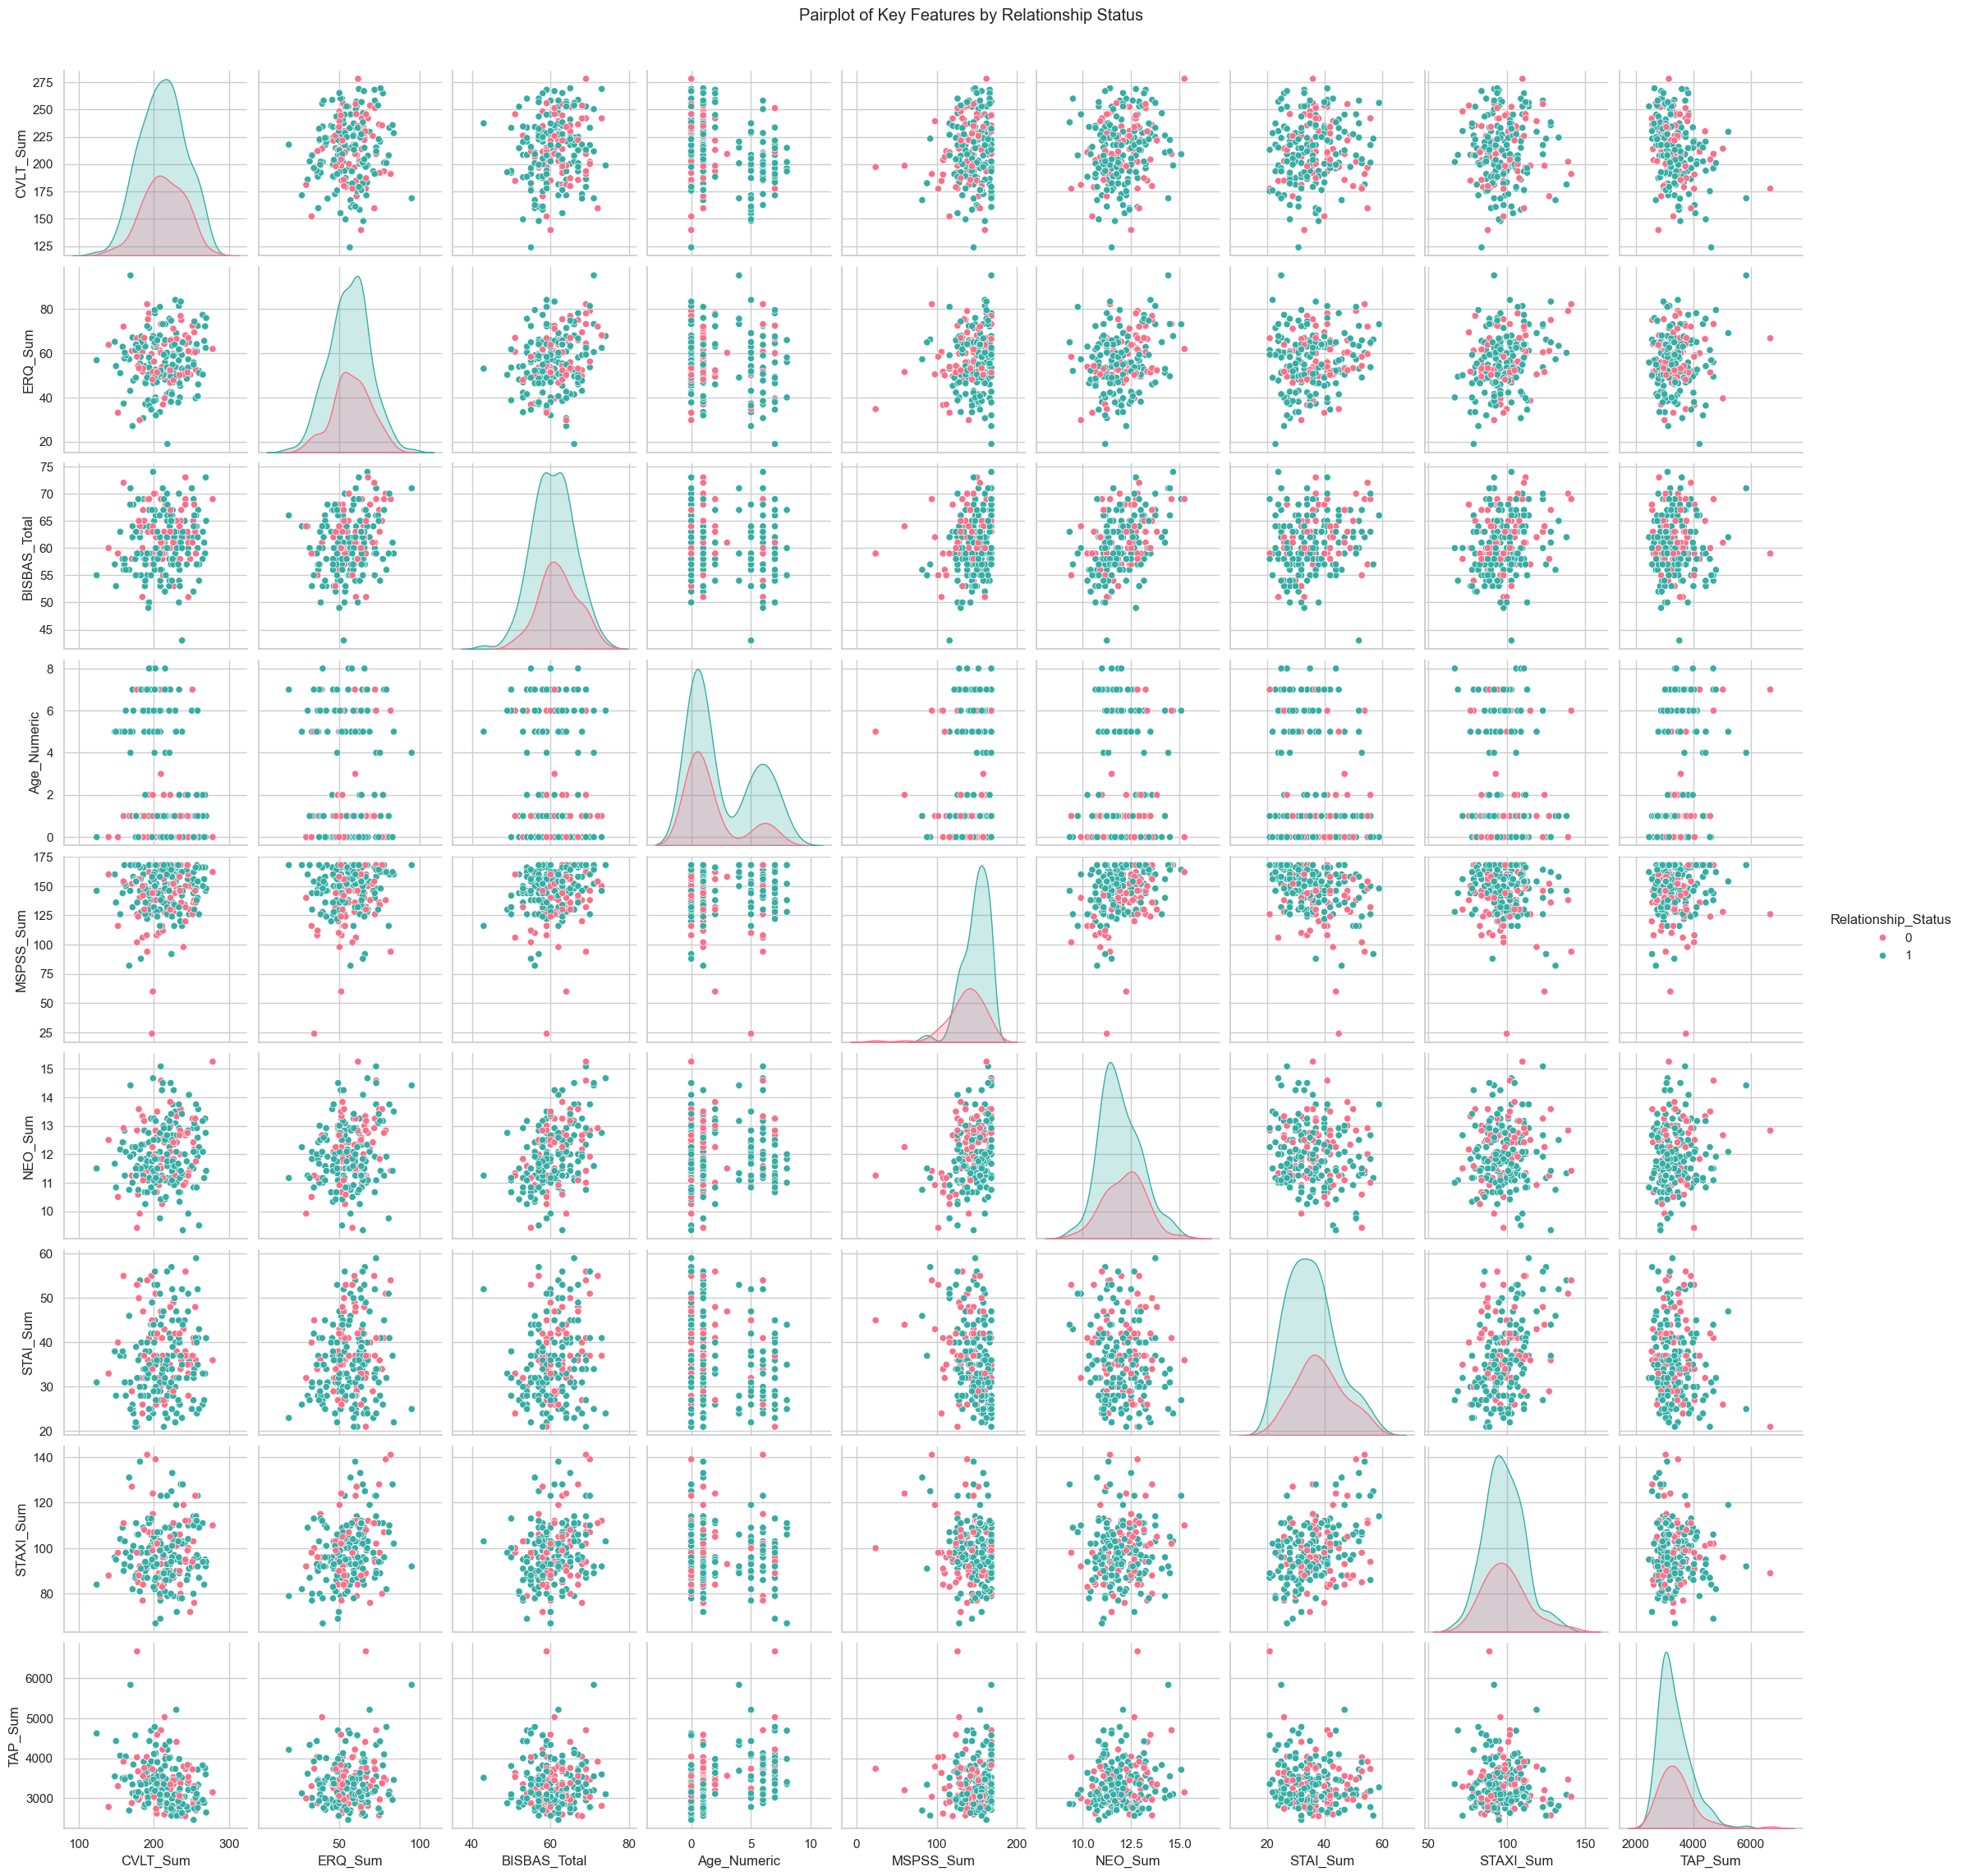

In [97]:
# Pairplot for Key Features by Relationship Status
pairplot_features = [
    "CVLT_Sum", "ERQ_Sum", "BISBAS_Total", "Age_Numeric", 
    "MSPSS_Sum", "NEO_Sum", "STAI_Sum", "STAXI_Sum", "TAP_Sum", 
    "Relationship_Status"
]

sns.pairplot(
    merged_data_clean[pairplot_features], 
    hue="Relationship_Status", 
    palette="husl"
)
plt.suptitle("Pairplot of Key Features by Relationship Status", y=1.02)
plt.show()

### Pairplot of Key Features

- **What it Shows:**  
  Pairwise relationships between key features (`CVLT_Sum`, `ERQ_Sum`, `BISBAS_Total`, `Age_Numeric`) are visualized, colored by `Relationship_Status`.

- **Observations:**
  - **Age_Numeric:** Strong separation between `YES` (older participants) and `NO` (younger participants).
  - **CVLT_Sum, ERQ_Sum, and BISBAS_Total:** Scattered and overlapping, showing weak separation between relationship groups.  


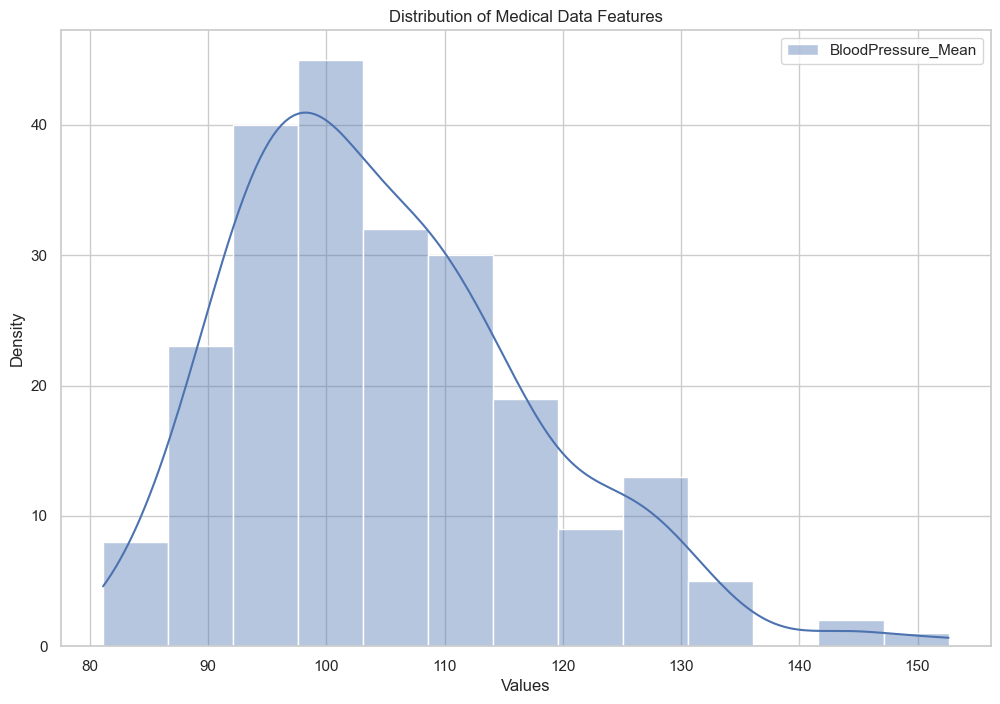

In [98]:
# Medical Data Visualization
medical_features = ["BloodPressure_Mean", "BloodSample_Sum", "Anthropometry_Sum"]
plt.figure(figsize=(12, 8))
for feature in medical_features:
    if feature in merged_data_clean.columns:
        sns.histplot(merged_data_clean[feature], kde=True, label=feature, fill=True, alpha=0.4)

plt.title("Distribution of Medical Data Features")
plt.xlabel("Values")
plt.ylabel("Density")
plt.legend()
plt.show()